In [67]:
import mindspore
import numpy as np
from mindspore import ops
from mindspore import Tensor, CSRTensor, COOTensor

In [68]:
data = [[ 1, 0, 1, 0 ],
        [0, 1, 0, 1 ]]
t_data = Tensor( data )

t_data, t_data.shape, t_data.dtype

(Tensor(shape=[2, 4], dtype=Int64, value=
 [[1, 0, 1, 0],
  [0, 1, 0, 1]]),
 (2, 4),
 mindspore.int64)

In [69]:
np_data = np.array( data )
t_np_data = Tensor( np_data )

t_np_data, t_np_data.shape, t_np_data.dtype

(Tensor(shape=[2, 4], dtype=Int64, value=
 [[1, 0, 1, 0],
  [0, 1, 0, 1]]),
 (2, 4),
 mindspore.int64)

In [70]:
from mindspore.common.initializer import One, Normal
tensor1 = mindspore.Tensor( shape = ( 2, 2 ), dtype = mindspore.float32, init = One() )
tensor1

Tensor(shape=[2, 2], dtype=Float32, value=
<uninitialized>)

In [71]:
tensor2 = mindspore.Tensor( shape = ( 2, 2 ), dtype = mindspore.float32, init = Normal() )
tensor2, tensor2.init_data()

(Tensor(shape=[2, 2], dtype=Float32, value=
 [[-0.00689525,  0.02008991],
  [-0.01765644, -0.00119581]]),
 Tensor(shape=[2, 2], dtype=Float32, value=
 [[-0.00689525,  0.02008991],
  [-0.01765644, -0.00119581]]))

In [72]:
x_data = Tensor( [ 1, 2, 3, 4 ] )
x_ones = ops.ones_like( x_data )
x_zeros = ops.zeros_like( x_data )

x_ones, x_zeros

(Tensor(shape=[4], dtype=Int64, value= [1, 1, 1, 1]),
 Tensor(shape=[4], dtype=Int64, value= [0, 0, 0, 0]))

In [73]:
t = Tensor( np.array( [ i for i in range( 9 ) ] ).reshape( 3, 3 ) )
t

Tensor(shape=[3, 3], dtype=Int64, value=
[[0, 1, 2],
 [3, 4, 5],
 [6, 7, 8]])

In [74]:
t[0]

Tensor(shape=[3], dtype=Int64, value= [0, 1, 2])

In [75]:
t[ 1, 1 ]

Tensor(shape=[], dtype=Int64, value= 4)

In [76]:
t[ :, 0 ]

Tensor(shape=[3], dtype=Int64, value= [0, 3, 6])

In [77]:
t[ ..., 0 ]

Tensor(shape=[3], dtype=Int64, value= [0, 3, 6])

In [78]:
x = Tensor( np.array( [ 1, 2, 3 ] ), mindspore.float32 )
y = Tensor( np.array( [ 4, 5, 6 ] ), mindspore.float32 )

add = x + y
add

Tensor(shape=[3], dtype=Float32, value= [ 5.00000000e+00,  7.00000000e+00,  9.00000000e+00])

In [79]:
sub = x - y
sub

Tensor(shape=[3], dtype=Float32, value= [-3.00000000e+00, -3.00000000e+00, -3.00000000e+00])

In [80]:
mul = x * y
mul

Tensor(shape=[3], dtype=Float32, value= [ 4.00000000e+00,  1.00000000e+01,  1.80000000e+01])

In [81]:
div = y / x
div

Tensor(shape=[3], dtype=Float32, value= [ 4.00000000e+00,  2.50000000e+00,  2.00000000e+00])

In [82]:
fdiv = y // x
fdiv

Tensor(shape=[3], dtype=Float32, value= [ 4.00000000e+00,  2.00000000e+00,  2.00000000e+00])

In [83]:
data1 = Tensor( np.array( [ i for i in range( 1, 5 ) ] ).reshape( 2, 2 ) )
data2 = Tensor( np.array( [ i for i in range( 5, 9 ) ] ).reshape( 2, 2 ) )

cc1 = ops.concat( ( data1, data2 ), axis = 0 )
cc2 = ops.concat( ( data1, data2 ), axis = 1 )
cc1, cc2

(Tensor(shape=[4, 2], dtype=Int64, value=
 [[1, 2],
  [3, 4],
  [5, 6],
  [7, 8]]),
 Tensor(shape=[2, 4], dtype=Int64, value=
 [[1, 2, 5, 6],
  [3, 4, 7, 8]]))

In [84]:
cc3 = ops.stack( [ data1, data2 ] )
cc3

Tensor(shape=[2, 2, 2], dtype=Int64, value=
[[[1, 2],
  [3, 4]],
 [[5, 6],
  [7, 8]]])

In [85]:
t = Tensor( [ 1, 2, 3, 4, 5 ] )
n = t.asnumpy()
type( n )

numpy.ndarray

In [86]:
t = Tensor.from_numpy( n )
type( t )

mindspore.common.tensor.Tensor

In [87]:
from mindspore.dataset import vision
from mindspore.dataset import MnistDataset, GeneratorDataset
import matplotlib.pyplot as plt
from download import download

In [88]:
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/" \
      "notebook/datasets/MNIST_Data.zip"
path = download( url, "../data", kind="zip", replace=True )


file_sizes: 100%|██████████████████████████| 10.8M/10.8M [00:01<00:00, 6.00MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ../data


In [89]:
train_dataset = MnistDataset( '../data/MNIST_Data/train', shuffle = False )
type( train_dataset )

mindspore.dataset.engine.datasets_vision.MnistDataset

In [90]:
def visualize( dataset ):
        figure = plt.figure( figsize = ( 4, 4 ) )
        cols, rows = 3, 3
    
        plt.subplots_adjust( wspace = 0.5, hspace = 0.5 )
    
        for i, ( img, label ) in enumerate( dataset.create_tuple_iterator() ):
                figure.add_subplot( rows, cols, i + 1 )
                plt.title( int( label ) )
                plt.imshow( img.asnumpy().squeeze(), cmap = 'gray' )
                if i == cols * rows - 1:
                        break
        plt.show()

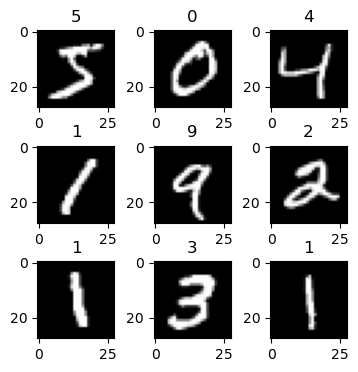

In [91]:
visualize( train_dataset )

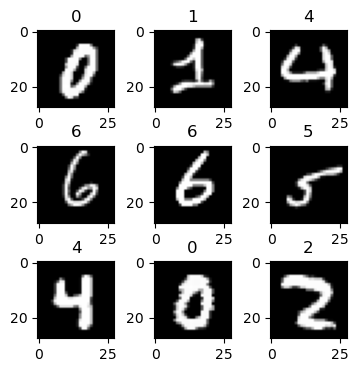

In [92]:
train_dataset = train_dataset.shuffle( buffer_size = 64 )
visualize( train_dataset )

In [93]:
image, label = next( train_dataset.create_tuple_iterator() )
image.shape, image.dtype

((28, 28, 1), mindspore.uint8)

In [94]:
train_dataset = train_dataset.map( vision.Rescale( 1.0 / 255.0, 0  ), input_columns = 'image' )
image.shape, image.dtype

((28, 28, 1), mindspore.uint8)

In [95]:
train_dataset = train_dataset.batch( batch_size = 32 )
image, label = next(train_dataset.create_tuple_iterator())
image.shape, image.dtype

((32, 28, 28, 1), mindspore.float32)

In [96]:
class RandomAccessDataset:
        def __init__( self ):
                self._data = np.ones( ( 5, 2 ) )
                self._label = np.ones( ( 5, 1 ) )
                # print( self._data, self._label )
                
        def __getitem__( self, idx ):
                return self._data[idx], self._label[idx]
        
        def __len__( self ):
                return len( self._data )

In [97]:
loader = RandomAccessDataset()
dataset = GeneratorDataset( source = loader, column_names = [ 'data', 'label' ] )

for data in dataset:
        print( data )

[Tensor(shape=[2], dtype=Float64, value= [ 1.00000000e+00,  1.00000000e+00]), Tensor(shape=[1], dtype=Float64, value= [ 1.00000000e+00])]
[Tensor(shape=[2], dtype=Float64, value= [ 1.00000000e+00,  1.00000000e+00]), Tensor(shape=[1], dtype=Float64, value= [ 1.00000000e+00])]
[Tensor(shape=[2], dtype=Float64, value= [ 1.00000000e+00,  1.00000000e+00]), Tensor(shape=[1], dtype=Float64, value= [ 1.00000000e+00])]
[Tensor(shape=[2], dtype=Float64, value= [ 1.00000000e+00,  1.00000000e+00]), Tensor(shape=[1], dtype=Float64, value= [ 1.00000000e+00])]
[Tensor(shape=[2], dtype=Float64, value= [ 1.00000000e+00,  1.00000000e+00]), Tensor(shape=[1], dtype=Float64, value= [ 1.00000000e+00])]


In [98]:
loader2 = [ np.array( 0 ), np.array( 1 ), np.array( 2 ) ]
loader2

[array(0), array(1), array(2)]

In [99]:
dataset2 = GeneratorDataset( source = loader2, column_names = [ 'data' ] )

for data in dataset2:
        print( data )

[Tensor(shape=[], dtype=Int64, value= 1)]
[Tensor(shape=[], dtype=Int64, value= 0)]
[Tensor(shape=[], dtype=Int64, value= 2)]


In [116]:
class IterableDataset():
        def __init__( self, start, end ):
                self.start = start
                self.end = end
        
        def __iter__( self ):
                self.data = iter( range( self.start, self.end ) )
                return self
        
        
        def __next__( self ):
                return next( self.data )

In [124]:
loader3 = IterableDataset( 1, 5 )
dataset3 = GeneratorDataset( source = loader3, column_names = [ 'data' ] )

print( dataset3 )
for data in dataset3:
        print( data )

RuntimeError: Exception thrown from user defined Python function in dataset. 

------------------------------------------------------------------
- Python Call Stack: 
------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\EC319\.conda\envs\mindspore_py39\lib\site-packages\mindspore\dataset\engine\datasets_user_defined.py", line 70, in _iter_fn
    yield _convert_row(val)
  File "C:\Users\EC319\.conda\envs\mindspore_py39\lib\site-packages\mindspore\dataset\engine\datasets_user_defined.py", line 158, in _convert_row
    item = np.array(row, copy=False)
ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

------------------------------------------------------------------
- Dataset Pipeline Error Message: 
------------------------------------------------------------------
[ERROR] Execute user Python code failed, check 'Python Call Stack' above.

------------------------------------------------------------------
- C++ Call Stack: (For framework developers) 
------------------------------------------------------------------
mindspore\ccsrc\minddata\dataset\engine\datasetops\source\generator_op.cc(259).




In [131]:
def my_generator( start, end ):
        for i in range( start, end ):
                yield ( i, )


dataset4 = GeneratorDataset( source = lambda: my_generator( 3, 6 ), column_names = [ 'data' ] )

for data in dataset4.create_tuple_iterator():
        print( data )
                

RuntimeError: Exception thrown from user defined Python function in dataset. 

------------------------------------------------------------------
- Python Call Stack: 
------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\EC319\.conda\envs\mindspore_py39\lib\site-packages\mindspore\dataset\engine\datasets_user_defined.py", line 88, in _generator_fn
    yield _convert_row(val)
  File "C:\Users\EC319\.conda\envs\mindspore_py39\lib\site-packages\mindspore\dataset\engine\datasets_user_defined.py", line 177, in _convert_row
    item = np.array(x, copy=False)
ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

------------------------------------------------------------------
- Dataset Pipeline Error Message: 
------------------------------------------------------------------
[ERROR] Execute user Python code failed, check 'Python Call Stack' above.

------------------------------------------------------------------
- C++ Call Stack: (For framework developers) 
------------------------------------------------------------------
mindspore\ccsrc\minddata\dataset\engine\datasetops\source\generator_op.cc(259).




In [125]:
from PIL import Image
from mindspore.dataset import transforms,vision, text

In [128]:
random_np = np.random.randint( 0, 255, ( 48, 48 ), np.uint8 )
random_image = Image.fromarray( random_np )

random_np, random_image

(array([[147,  20,  14, ...,  48,  56, 174],
        [117,  31, 197, ..., 136, 108, 185],
        [196, 196, 234, ...,  10, 164,  45],
        ...,
        [ 39, 151, 105, ...,  12,  74,  95],
        [249,  10, 184, ..., 250, 238,  24],
        [201,  62,  21, ..., 248,  79, 176]], dtype=uint8),
 <PIL.Image.Image image mode=L size=48x48>)

In [129]:
rescale = vision.Rescale( 1.0 / 255.0, 0 )
rescale_image = rescale( random_image )

rescale_image

array([[0.5764706 , 0.07843138, 0.05490196, ..., 0.18823531, 0.21960786,
        0.68235296],
       [0.45882356, 0.12156864, 0.7725491 , ..., 0.53333336, 0.42352945,
        0.7254902 ],
       [0.7686275 , 0.7686275 , 0.9176471 , ..., 0.03921569, 0.6431373 ,
        0.1764706 ],
       ...,
       [0.15294118, 0.5921569 , 0.41176474, ..., 0.04705883, 0.2901961 ,
        0.37254903],
       [0.97647065, 0.03921569, 0.72156864, ..., 0.9803922 , 0.9333334 ,
        0.09411766],
       [0.78823537, 0.24313727, 0.08235294, ..., 0.9725491 , 0.30980393,
        0.6901961 ]], dtype=float32)

In [132]:
normalize = vision.Normalize( mean = ( 0.1307, ), std = ( 0.3081, ) )
normalize_image = normalize( rescale_image )

normalize_image

array([[ 1.4468375 , -0.16964827, -0.24601768, ...,  0.18674232,
         0.28856817,  1.7904998 ],
       [ 1.0649905 , -0.02963769,  2.0832493 , ...,  1.306827  ,
         0.9504364 ,  1.9305104 ],
       [ 2.070521  ,  2.070521  ,  2.554194  , ..., -0.29693064,
         1.6632175 ,  0.14855757],
       ...,
       [ 0.07218818,  1.4977505 ,  0.9122518 , ..., -0.27147415,
         0.51767635,  0.7849693 ],
       [ 2.7451174 , -0.29693064,  1.9177822 , ...,  2.7578456 ,
         2.6051068 , -0.11873532],
       [ 2.1341622 ,  0.36493757, -0.15692005, ...,  2.7323892 ,
         0.58131754,  1.8159562 ]], dtype=float32)

(height, width, channel) & (channel, height, width)

In [133]:
hwc_image = np.expand_dims( normalize_image, -1 )
hwc2chw = vision.HWC2CHW()
chw_image = hwc2chw( hwc_image )

# 
hwc_image.shape, chw_image.shape

((48, 48, 1), (1, 48, 48))

In [135]:
texts = [ 'Welcome to Beijing' ]
test_dataset = GeneratorDataset( texts, 'text' )

test_dataset

In [136]:
def my_tokenizer( content ):
        return content.split()

test_dataset = test_dataset.map( text.PythonTokenizer( my_tokenizer ) )

next( test_dataset.create_tuple_iterator() )

RuntimeError: Exception thrown from user defined Python function in dataset. 

------------------------------------------------------------------
- Python Call Stack: 
------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\EC319\.conda\envs\mindspore_py39\lib\site-packages\mindspore\dataset\engine\datasets_user_defined.py", line 103, in _cpp_sampler_fn
    yield _convert_row(val)
  File "C:\Users\EC319\.conda\envs\mindspore_py39\lib\site-packages\mindspore\dataset\engine\datasets_user_defined.py", line 158, in _convert_row
    item = np.array(row, copy=False)
ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

------------------------------------------------------------------
- Dataset Pipeline Error Message: 
------------------------------------------------------------------
[ERROR] Execute user Python code failed, check 'Python Call Stack' above.

------------------------------------------------------------------
- C++ Call Stack: (For framework developers) 
------------------------------------------------------------------
mindspore\ccsrc\minddata\dataset\engine\datasetops\source\generator_op.cc(259).


